# Investigate the Quality of OxfordIIITPet

In [1]:
#!pip install torch==2.0.0 torchvision scienceplots einops torchinfo randomname seaborn -q

In [7]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# TODO: replace with package after public on PyPi
import sys

sys.path.append("../")

from src.cleaner.selfclean import PretrainingType, SelfClean

In [8]:
dataset_splits = []
for split in ["trainval", "test"]:
    dataset_splits.append(datasets.OxfordIIITPet(root="./OxfordIIITPet", download=True, split=split))
dataset = torch.utils.data.ConcatDataset(dataset_splits)

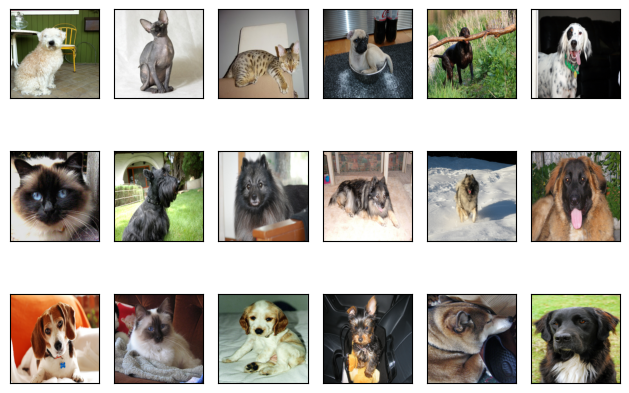

In [9]:
fig, axes = plt.subplots(3, 6)
for h_idx, h_ax in enumerate(axes):
    for v_idx, ax in enumerate(h_ax):
        index = np.random.randint(0, high=len(dataset))
        ax.imshow(transforms.Resize((256, 256))(dataset[index][0]))
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
fig.tight_layout()
plt.show()

In [5]:
selfclean = SelfClean(
    auto_cleaning=True,
    plot_distribution=True,
    plot_top_N=7,
)
out_dict = selfclean.run_on_dataset(
    dataset=dataset,
    pretraining_type=PretrainingType.DINO,
    num_workers=24,
    epochs=100,
    batch_size=16,
)

Will run the code on one GPU.
STARTUP | distributed init (rank 0): env://
Running on: cuda
Run directory of model: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-ConcatDataset-weary-iteration
Data loaded: there are 7349 train images, 460 batches, and a batch size of 16.
Single GPU detected, model will run on single instance.
Single GPU detected, model will run on single instance.
Student and Teacher are built: they are both vit_tiny network.


  0%|                                                                                                                                                                                                                       | 0/100 [00:16<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 10.72 GiB total capacity; 892.85 MiB already allocated; 22.25 MiB free; 970.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# TODO: plot dups, irr, lbls individually